# Import Statements

In [1]:
import numpy as np
import pandas as pd
import time
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
import os

# Reading the Data
There were one hundred and twenty five files containing the CPU readings. Each file contained the minimum, average, and maximum for each VM at a specific timestamp.

In [2]:
cpu_readings1 = pd.read_csv('D:/FYP/AzureDatasetPacking2019/VM CPU Readings/vm_cpu_readings-file-1-of-125.csv.gz', 
                           compression='gzip', names=['timestamp', 'vm id', 'min cpu', 'max cpu', 'avg cpu'], 
                           sep=',', quotechar='"')
cpu_readings1.head()

,timestamp,vm id,min cpu,max cpu,avg cpu
0,0,+ZcrOp5/c/fJ6mVgP5qMZlOAGDwyjaaDNM0WoWOt2IDb47...,2.052803,3.911587,2.869790
1,0,2zrgeOqUDy+l0GVi5NXudU+3sqZH+nLowfcz+D/JsCymTX...,1.646950,8.794403,3.254472
2,0,/34Wh1Kq/qkNkW0tQrMiQ1eZ8hg9hHopydCzsXriefhgrn...,2.440088,6.941048,4.336240
3,0,2lzdXk1Rqn1ibH2kZhGamYTMvVcRP6+x8b5zGiD/8t++5B...,0.302992,2.046712,0.970692
4,0,0GrUQuLhCER5bWWcoJAgblPJWkaU4v3nf+NUrZnFTlXWEK...,1.515922,4.471657,2.438805


In [5]:
cpu_readings1.head().to_csv("C:/Users/user/OneDrive - University College Cork/UCC/Year 4/FYP/Final Report/Tables/CPU Readings 1.csv")

In [3]:
print("No. of Rows with Timestamp not a multiple of 5 minutes: ", ((cpu_readings1["timestamp"] % 300 != 0)).sum())
print("Total No. of Rows: ", len(cpu_readings1.index))

No. of Rows with Timestamp not a multiple of 5 minutes:  0
Total No. of Rows:  10000000


# Pre-Processing
In order to process these files, each individual file was first aggregated by time stamp to get the total sum of the average and maximum CPU usage at each time stamp.

In [9]:
for file in os.listdir("F:/FYP/AzureDatasetPacking2019/VM CPU Readings"):
    cpu_memory_reading = pd.read_csv("F:/FYP/AzureDatasetPacking2019/VM CPU Readings/" + file, compression='gzip', 
                                 names=['timestamp', 'vm id', 'min cpu', 'max cpu', 'avg cpu'], sep=',', quotechar='"')
    cpu_memory_reading = cpu_memory_reading.groupby('timestamp').agg({"avg cpu":'sum',
                                            'max cpu':'sum'})
    cpu_memory_reading.to_csv("C:/Users/ehlocal/OneDrive - University College Cork/UCC/Year 4/FYP/CPU Memory Aggregation 2/" + str(file[0:-7]) + ".csv")

The individually aggregated files were combined into a single dataframe. Then as the readings in each file were ordered by timestamp, the last time stamp in one file was sometimes the same timestamp as the first timestamp in the next file resulting in rows with the same timestamp. To resolve this, the aggregation that had been run on the single files was implented once more on the dataframe that combined all 125 files.

In [3]:
aggregated_cpu_readings = pd.DataFrame()
for file in os.listdir("D:/FYP/AzureDatasetPacking2019/Aggregated Data/CPU Readings Aggregation"):
    individ_file = pd.read_csv("D:/FYP/AzureDatasetPacking2019/Aggregated Data/CPU Readings Aggregation/" + file)
    aggregated_cpu_readings = aggregated_cpu_readings.append(individ_file)

In [4]:
aggregated_cpu_readings.shape

(11641, 3)

In [5]:
len(np.unique(aggregated_cpu_readings["timestamp"]))

11517

In [6]:
aggregated_cpu_readings[aggregated_cpu_readings["timestamp"].duplicated(keep=False)]

,timestamp,avg cpu,max cpu
70,21000,7.566361e+05,1.451319e+06
0,188400,5.870905e+05,1.115624e+06
71,209700,3.570706e+05,6.690535e+05
0,2061600,1.077751e+06,1.940617e+06
138,2082300,7.953052e+05,1.454434e+06
...,...,...,...
142,2020200,2.723892e+05,4.982031e+05
0,2020200,8.747763e+05,1.601421e+06
140,2041200,2.942990e+05,5.201345e+05
0,2041200,1.030168e+06,1.825420e+06


In [37]:
11641 - 11517 # number of duplicates 
# most likely from concatonating the separate files which may have had overlapping time intervals at start/end of each file

124

In [ ]:
aggregated_cpu = aggregated_cpu.groupby('timestamp').agg({"avg cpu":'sum','max cpu':'sum'})

In [2]:
aggregated_cpu.to_csv("C:/Users/ehlocal/OneDrive - University College Cork/UCC/Year 4/FYP/CPU Memory Aggregation 2/aggregated_cpu_take2.csv")

NameError: name 'aggregated_cpu' is not defined

### Load the aggregated data

In [3]:
aggregated_cpu = pd.read_csv("D:/FYP/AzureDatasetPacking2019/Aggregated Data/aggregated_cpu_readings_TSerror.csv")

In [4]:
aggregated_cpu = aggregated_cpu.set_index("timestamp")

In [5]:
aggregated_cpu.tail()

,Unnamed: 0,avg cpu,max cpu
timestamp,,,
2591100,11512,1.224160e+06,2.187872e+06
2591200,11513,1.150015e+02,2.985789e+02
2591400,11514,1.201418e+06,2.156185e+06
2591500,11515,9.492640e+01,1.661888e+02
2591700,11516,1.207811e+06,2.190316e+06


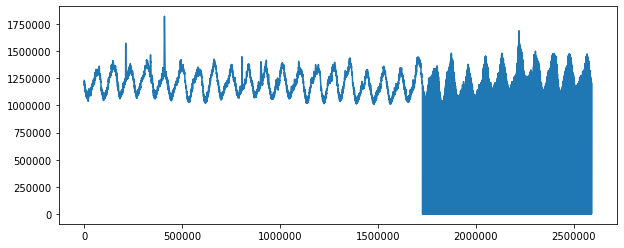

In [7]:
plt.figure(figsize=(10,4))
plt.plot(aggregated_cpu["avg cpu"])
plt.ticklabel_format(axis='both', style='plain')
plt.show()

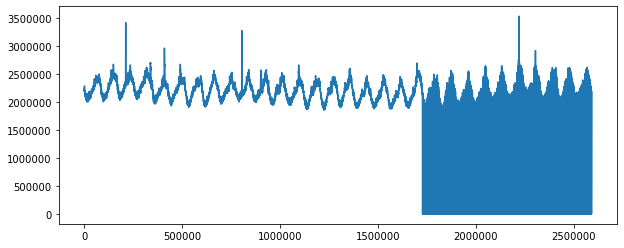

In [8]:
plt.figure(figsize=(10,4))
plt.plot(aggregated_cpu["max cpu"])
plt.ticklabel_format(axis='both', style='plain')
plt.show()

In [8]:
print("No. of Rows with Timestamp not a multiple of 5 minutes: ", ((aggregated_cpu.index % 300 != 0)).sum())
print("Total No. of Rows: ", len(aggregated_cpu.index))

No. of Rows with Timestamp not a multiple of 5 minutes:  2877
Total No. of Rows:  11517


### Fix the Aggregated Data
The large fluxuation in the above plots was caused by the timestamp on several of the CPU Reading files being out of sync and recording data for different 5 minute windows compared to the rest of the readings. To resolve this, we created a temporary data frame. For each out of synce timestamp recorded, we got the correct timestamp that occured before and after the out of sync time stamp. A weight, which was calculated to be the fraction for which the aggregated average and max cpu ran for in the correct preceding and succeeding timestamps, was applied to the recorded usage and a new row for both the preceding and succeeding timestamps was added to the temporary dataframe (along with their corresponding usage recordings). The rows with out of sync time stamps were deleted from aggregated_cpu. The temporary dataframe was concatonated onto aggregated_cpu and the resulting data frame was grouped by timestamp to sum the recorded average and max usage.

In [9]:
print(400%300 )
# correct timestamp 300, 600
1 - 400%300 / 300, (400%300 / 300) # 2/3 of 400 ts start happens in 300 ts and 1/3 happens in 600 ts

100


(0.6666666666666667, 0.3333333333333333)

In [10]:
print(500%300 )
# timestamp 300, 600
1 - 500%300 / 300, (500%300 / 300) # 1/3 of 400 ts start happens in 300 ts and 2/3 happens in 600 ts

200


(0.33333333333333337, 0.6666666666666666)

In [11]:
sub_df = pd.DataFrame()
for time in aggregated_cpu.index:
    if time % 300 != 0:
        # create timestamp for 5 minute period before and after
        new_time1 = np.floor((time/(300)))*300
        new_time2 = np.ceil((time/(300)))*300
        # create weight for the timestamp before and after the out of sync timestamp
        weight = ((time % 300) / 300)
        weight1 = 1 - weight
        weight2 = weight
        # calculcate the weighted avg and max cpu for each timestamp
        avg_c = aggregated_cpu.loc[time, "avg cpu"]
        max_c = aggregated_cpu.loc[time, "max cpu"]
        min_entry = pd.DataFrame({"timestamp":new_time1, "avg cpu": weight1*avg_c, "max cpu":weight1*max_c }, index=[0])
        max_entry = pd.DataFrame({"timestamp":new_time2, "avg cpu": weight2*avg_c, "max cpu":weight2*max_c }, index=[0])
        # add weighted usage into new row in a temporary dataframe
        sub_df = pd.concat([sub_df, min_entry])
        sub_df = pd.concat([sub_df, max_entry])

# drop rows with out of sync entries
aggregated_cpu = aggregated_cpu.drop(aggregated_cpu[aggregated_cpu.index % 300 != 0].index)
# add in new entries with weight corrected values to replace the deleted entries
aggregated_cpu = pd.concat([aggregated_cpu.reset_index(), sub_df])
# aggregate
aggregated_cpu = aggregated_cpu.groupby('timestamp').agg({"avg cpu":'sum','max cpu':'sum'})
aggregated_cpu.tail()

,avg cpu,max cpu
timestamp,,
2590500.0,1.242130e+06,2.233173e+06
2590800.0,1.235946e+06,2.219454e+06
2591100.0,1.224276e+06,2.188154e+06
2591400.0,1.201519e+06,2.156395e+06
2591700.0,1.207842e+06,2.190372e+06


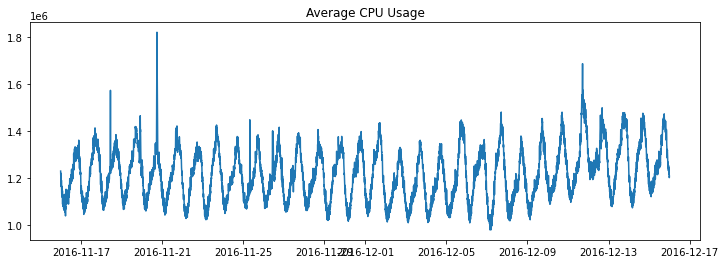

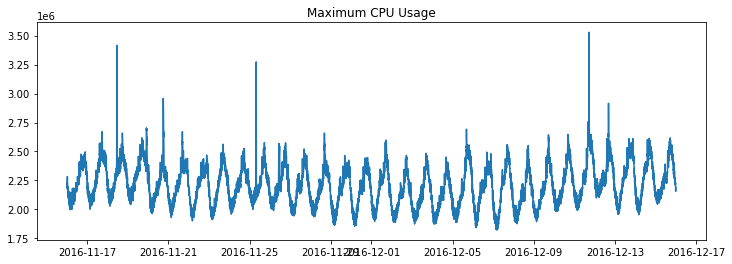

In [15]:
plt.figure(figsize=(12,4))
plt.plot(aggregated_cpu["avg cpu"])
plt.title('Average CPU Usage')
plt.show()

plt.figure(figsize=(12,4))
plt.plot(aggregated_cpu["max cpu"])
plt.title('Maximum CPU Usage')
plt.show()

### Convert Timestamp to Date Time

In [13]:
no_days_difference =  datetime(2016, 11, 16, 0, 0)  - datetime(1970, 1, 1, 0, 0) # = 17121
date_time = []
for time in aggregated_cpu.index:
    date_t = datetime.fromtimestamp(time) + timedelta(days=no_days_difference.days)
    date_time.append(date_t)
aggregated_cpu["datetime"] = date_time

In [14]:
aggregated_cpu = aggregated_cpu.set_index("datetime")
aggregated_cpu.head()

,avg cpu,max cpu
datetime,,
2016-11-16 00:00:00,1.229569e+06,2.223302e+06
2016-11-16 00:05:00,1.211322e+06,2.212393e+06
2016-11-16 00:10:00,1.206635e+06,2.213057e+06
2016-11-16 00:15:00,1.190369e+06,2.187572e+06
2016-11-16 00:20:00,1.180992e+06,2.183684e+06


In [16]:
aggregated_cpu.to_csv("D:/FYP/AzureDatasetPacking2019/Aggregated Data/aggregated_cpu_correctdates.csv")